# Методы оптимизации,№2
### Коноплёв Павел


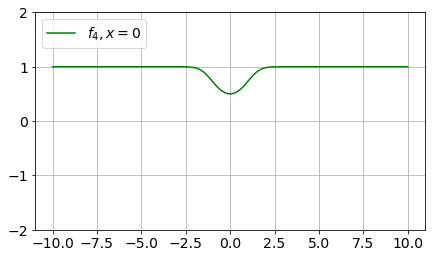

In [117]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', **{'size' : 14})
x = np.linspace(-10. + 0.001, 10, 100);
plt.figure(figsize=(7,4))
plt.plot(x, 1/(1 + np.exp(-x**2)), 'g', label='$f_4, x = 0$');
plt.grid()
plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()

In [96]:
import numpy as np
import math
import autograd.numpy as npgrad
from autograd import grad, hessian
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize

def f1(x):
    x1, x2 = x
    f = 1/(1 + math.e**(-x1**2-x2**2 + x1*x2)) + (x1)**2
    return f

xo = 1.1
A = np.matrix([[80.0, 0.0, 0.0, 0.0], [0.0, 80.0, 0.0, 0.0], [0.0, 0.0, 80.0, 0.0], [0.0, 0.0, 0.0, 80.0]])
b = np.matrix([[0.0], [0.0], [0.0], [0.0]])  
c = 0.0

def f2(x):
    x1, x2, x3, x4 = x
    f = 40*(x4 - xo)**2 + 40*(x3 - xo)**2 + 40*(x2 - xo)**2 + 40*(x1 - xo)**2 + (xo**2 - 3)**2
    return f

def f5(x):
    x1, x2 = x
    f = abs(abs(4*x1 - 3*x2) - abs(x1 + x2))/2 + (abs(4*x1 - 3*x2) + abs(x1 + x2))/2
    return f

def f3(x):
    x1, x2 = x
    f = 4*(x2 - x1)**2 + 3*(x1 - 1)**2
    return f

def f6(x):
    x1, x2, x3 = x
    f = 0.5*((3*x1 + 2*x2 - 1)**2 + (2*x1 - 3*x2 - 1)**2) + 0.9*(abs(x1) + abs(x2) + abs(x3))
    return f

def f6_f(x):
    x1, x2, x3 = x
    f = 0.5*((3*x1 + 2*x2 - 1)**2 + (2*x1 - 3*x2 - 1)**2)
    return f

def gradf3(x):
    x1, x2 = x
    f1 = 8*(x1 - x2) + 6*(x1 - 1)
    f2 = 8*(x2 - x1)
    return np.array([f1, f2])

def f6_h(x):
    x1, x2, x3 = x
    f = 0.9*(abs(x1) + abs(x2) + abs(x3))
    return f

def proxyNorm_h(x, l):
    x1, x2, x3 = x
    f1 = np.sign(x1)*max(0, abs(x1) - 0.9*l)
    f2 = np.sign(x2)*max(0, abs(x2) - 0.9*l)
    f3 = np.sign(x3)*max(0, abs(x3) - 0.9*l)
    return np.array([f1, f2, f3])

def argminf3(xk, a):
    x1, x2 = xk
    x = min(x1 - 3*a*(x1 - 1), -1)
    return np.array([x, x + 1])

In [13]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from matplotlib import pyplot as plt

def plot_3d_function(x1, x2, f, title, minima = None, iterations = None):
    '''
    '''
    low_lim_1 = x1.min()
    low_lim_2 = x2.min()
    up_lim_1 = x1.max()
    up_lim_2 = x2.max()
    X1, X2 = np.meshgrid(x1, x2)
    Z = f((X1, X2))

    fig = plt.figure(figsize=(16,7))
    fig.suptitle(title)

    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    
    surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1,
    cmap=cm.RdBu,linewidth=0, antialiased=False)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    if minima is not None:
        minima_ = np.array(minima).reshape(-1, 1)
        ax.plot(*minima_, f(minima_), 'r*', markersize=10)


    ax = fig.add_subplot(1, 2, 2)
    
    im = ax.imshow(Z,cmap=plt.cm.RdBu, origin = "lower", extent=[low_lim_1, up_lim_1, low_lim_2, up_lim_2])
    cset = ax.contour(X1, X2, Z,linewidths=2,cmap=plt.cm.Set2)
    ax.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
    fig.colorbar(im)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    if minima is not None:
        minima_ = np.array(minima).reshape(-1, 1)
        ax.plot(*minima_, 'r*', markersize=10)

    if iterations is not None:
        for point in iterations:
            ax.plot(*point, 'go', markersize=3)
        iterations = np.array(iterations).T
        ax.quiver(iterations[0,:-1], iterations[1,:-1], iterations[0,1:]-iterations[0,:-1], iterations[1,1:]-iterations[1,:-1], scale_units='xy', angles='xy', scale=1, color='blue')
    plt.savefig('plot_3d.svg')
    plt.show()

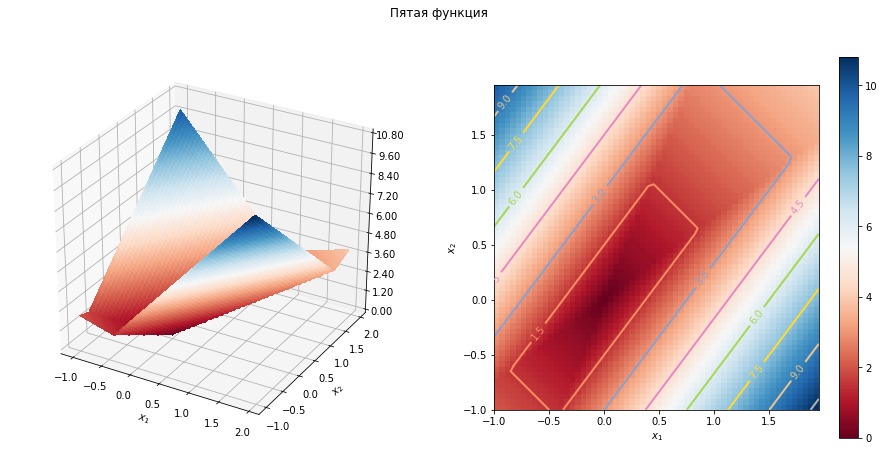

In [68]:
up_lim = 2
low_lim = -1
x1 = np.arange(low_lim, up_lim, 0.05)
x2 = np.arange(low_lim, up_lim, 0.05)
title = f'Пятая функция'
plot_3d_function(x1, x2, f5, title)

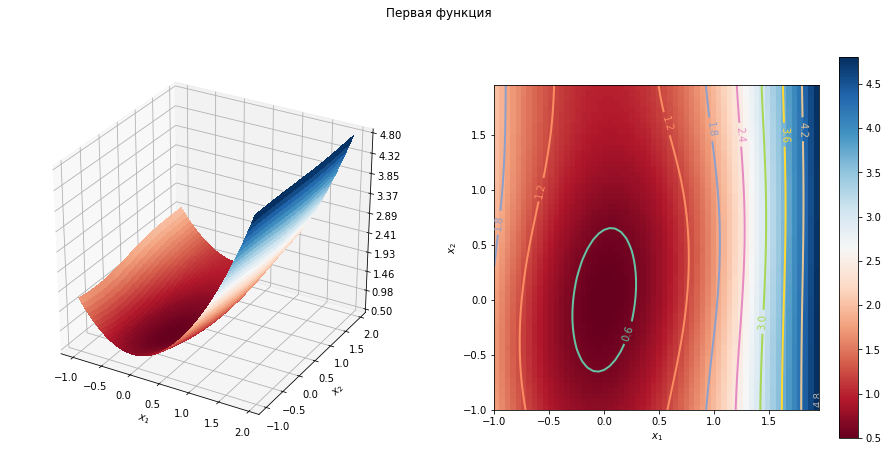

In [70]:
title = f'Первая функция'
plot_3d_function(x1, x2, f1, title)

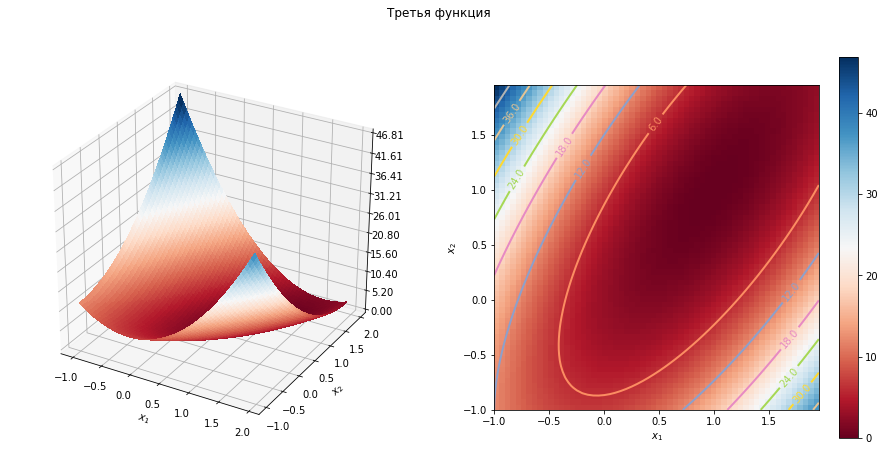

In [71]:
title = f'Третья функция'
plot_3d_function(x1, x2, f3, title)

In [59]:
def Newton(f, gradf, hessf, x0, epsilon, x_real, num_iter = 500):
    norms_g = []
    norms_x = []
    norms_f = []
    x = x0.copy()
    norms_g.append(np.linalg.norm(gradf(x)))
    norms_f.append(np.linalg.norm(f(x) - f(x_real)))
    norms_x.append(np.linalg.norm(x - x_real))
    iteration = 0
    opt_arg = {"f": f, "grad_f": gradf}
    while True:
        gradient = gradf(x)
        hess = hessf(x)
        h = np.linalg.solve(hess, -gradient)
        x = x + h
        norms_g.append(np.linalg.norm(gradf(x)))
        norms_f.append(np.linalg.norm(f(x) - f(x_real)))
        norms_x.append(np.linalg.norm(x - x_real))
        iteration += 1
        print("Current x =", x)
        print("Current function val =", f(x))
        print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x))}
    ind = list(range(0, len(norms_g)))
    
    fig_g, ax_g = plt.subplots()

    ax_g.set_title('Точность по градиенту')
    
    plt.plot(ind, norms_g)
    
    fig_f, ax_f = plt.subplots()

    ax_f.set_title('Точность по функции')
    
    plt.plot(ind, norms_f)
                       
    fig_x, ax_x = plt.subplots()

    ax_x.set_title('Точность по аргументу')
    
    plt.plot(ind, norms_x)
    return res

In [6]:
def QuadraticCG(A, b, c, x_0, eps, num_iter = 500):
    x = x_0
    i = 0
    r = b - A * x
    delta = r.T * r
    delta0 = delta
    while i < num_iter and delta > eps:
        alpha = float(delta / (r.T * (A * r)))
        x = x + alpha * r
        r = b - A * x
        delta = r.T * r
        i += 1
        print("Current function val =", (0.5 * x.T * A * x - b.T * x + c))
        print("Current gradient norm = ", np.linalg.norm(b - A * x))
        if np.linalg.norm(b - A * x) < eps:
            break
        if i >= num_iter:
            break
    res = {"x": x, "num_iter": i, "GradNorm": np.linalg.norm(b - A * x)}
    return res

In [97]:
def CompositeDescent(f, h, gradf, proxyh, x_0, x_real, eps, num_iter = 500):
    f_h_real = f(x_real) + h(x_real)
    x = x_0
    norms_x = []
    norms_f = []
    norms_f.append(np.linalg.norm(f(x) + h(x) - f_h_real))
    norms_x.append(np.linalg.norm(x - x_real))
    L = 1
    i = 0
    while i < num_iter and np.linalg.norm(f(x) + h(x) - f_h_real) > eps:
        Lv = L
        x_pred = x
        x = proxyh(x - 1/Lv*gradf(x), 1/Lv)
        norms_f.append(np.linalg.norm(f(x) + h(x) - f_h_real))
        norms_x.append(np.linalg.norm(x - x_real))
        print("Current x =", x)
        print("Current function val =", f(x))
        i += 1
        while f(x) > f(x_pred) + np.dot(gradf(x_pred), x - x_pred) + Lv/2*np.linalg.norm(x - x_pred)**2:
            Lv = 2*Lv
            x = proxyh(x - 1/Lv*gradf(x), 1/Lv)
            norms_f.append(np.linalg.norm(f(x) + h(x) - f_h_real))
            norms_x.append(np.linalg.norm(x - x_real))
            print("Current x =", x)
            print("Current function val =", f(x))
            i += 1
            if np.linalg.norm(f(x) + h(x) - f_h_real) < eps:
                break
            if i >= num_iter:
                break
        L = Lv/2
    res = {"x": x, "num_iter": i, "FuncNorm": np.linalg.norm(f(x) + h(x) - f_h_real)}
    
    ind = list(range(0, len(norms_f)))
    
    fig_g, ax_g = plt.subplots()

    ax_g.set_title('Точность по функции')
    
    plt.plot(ind, norms_f)
    
    fig_f, ax_f = plt.subplots()

    ax_f.set_title('Точность по аргументу')
    
    plt.plot(ind, norms_x)
    return res

In [115]:
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
def NonQuadraticCG(f, gradf, x_0, eps, x_real, num_iter = 500):
    x = x_0
    norms_g = []
    norms_x = []
    norms_f = []
    norms_g.append(np.linalg.norm(gradf(x)))
    norms_f.append(np.linalg.norm(f(x) - f(x_real)))
    norms_x.append(np.linalg.norm(x - x_real))
    i = 0
    d = -gradf(x)
    while i < num_iter and np.linalg.norm(gradf(x)) > eps:
        alpha = minimize_scalar(lambda alpha: f(x + alpha * d), method ='Golden')
        if np.linalg.norm(gradf(x + alpha.x * d)) < eps:
            x = x + alpha.x * d
            norms_g.append(np.linalg.norm(gradf(x)))
            norms_f.append(np.linalg.norm(f(x) - f(x_real)))
            norms_x.append(np.linalg.norm(x - x_real))
            break
        if (d.dot(gradf(x + alpha.x * d) - gradf(x)) != 0):
            bk = (gradf(x + alpha.x * d).dot(gradf(x + alpha.x * d) - gradf(x)))/(d.dot(gradf(x + alpha.x * d) - gradf(x)))
        k = d
        d = -gradf(x + alpha.x * d) + bk*d
        x = x + alpha.x * k
        norms_g.append(np.linalg.norm(gradf(x)))
        norms_f.append(np.linalg.norm(f(x) - f(x_real)))
        norms_x.append(np.linalg.norm(x - x_real))
        i += 1
        print("Current x =", x)
        print("Current function val =", f(x))
        print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < eps:
            break
        if i >= num_iter:
            break
    res = {"x": x, "num_iter": i, "GradNorm": np.linalg.norm(gradf(x))}
    ind = list(range(0, len(norms_g)))
    
    fig_g, ax_g = plt.subplots()

    ax_g.set_title('Точность по градиенту')
    
    plt.plot(ind, norms_g)
    
    fig_f, ax_f = plt.subplots()

    ax_f.set_title('Точность по функции')
    
    plt.plot(ind, norms_f)
                       
    fig_x, ax_x = plt.subplots()

    ax_x.set_title('Точность по аргументу')
    
    plt.plot(ind, norms_x)
    return res

In [90]:
def Projected_descent(x_0, f, gradf, argmin, x_real, eps = 1e-18, max_iter = 1000):
    iterations = []
    norms = []
    norms_x = []
    norms_f = []
    i = 0
    x = np.array(x_0)
    iterations.append(x)
    a = 0.1
    norms.append(np.linalg.norm(gradf(x)))
    norms_x.append(np.linalg.norm(x - x_real))
    norms_f.append(np.linalg.norm(f(x) - f(x_real)))
    while np.linalg.norm(f(x) - f(x_real)) > eps and i <= max_iter:        
        x_pred = x
        x = argmin(x, a)
        iterations.append(x)
        i += 1
        norms.append(np.linalg.norm(gradf(x)))
        norms_x.append(np.linalg.norm(x - x_real))
        norms_f.append(np.linalg.norm(f(x) - f(x_real)))
        print("Current x =", x)
        print("Current function val =", f(x))
        print("Current gradient norm = ", np.linalg.norm(gradf(x)))
    ind = list(range(0, len(norms)))
    
    fig, ax = plt.subplots()

    ax.set_title('Точность по функции')
    
    plt.plot(ind, norms_f)
    
    fig, ax = plt.subplots()

    ax.set_title('Точность по аргументу')
    
    plt.plot(ind, norms_x)
    res = {"x": x, "num_iter": i, "GradNorm": np.linalg.norm(gradf(x))}
    return res

## Задача 1
Из прошлого ДЗ мы знаем, что данная функция является выпуклой на квадрате $[-\frac{1}{2}, \frac{1}{2}] \times [-\frac{1}{2}, \frac{1}{2}]$; гессиан в окрестности нуля положительно определён - при старте из этой области метод Ньютона не имеет явных недостатков. C другой стороны, при старте с дальней точки мы получаем, что метод не сходится при слишком далёких точках. Метод сопряжённых градиентов держится чуть ненамного дольше и аналогично приводит к неправильной точке при плохом старте начальных приближений.

### Первая функция, метод Ньютона, хороший старт, $\epsilon = 0.01, 0.001$

Current x = [-0.17470096 -0.76707247]
Current function val = 0.6494275953492469
Current gradient norm =  0.40713094118696336
Current x = [0.0077783  0.20523426]
Current function val = 0.5102054170579556
Current gradient norm =  0.10554911729908628
Current x = [-2.02531816e-06 -3.33161458e-04]
Current function val = 0.5000000275855772
Current gradient norm =  0.00018357608907129517


{'x': array([-2.02531816e-06, -3.33161458e-04]),
 'num_iter': 3,
 'tol': 0.00018357608907129517}

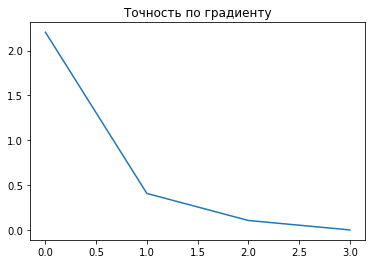

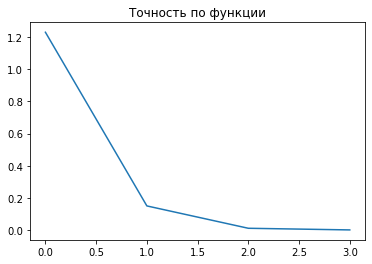

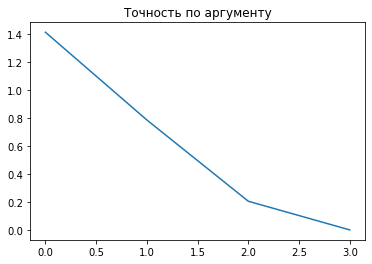

In [60]:
x_0 = np.array([1.0, 1.0])
x_real = np.array([0.0, 0.0])

Newton(f1, grad(f1), hessian(f1), x_0, 1e-2, x_real, num_iter = 500)

### Первая функция, метод Ньютона, хороший старт, $\epsilon = 0.00001$

Current x = [-0.17470096 -0.76707247]
Current function val = 0.6494275953492469
Current gradient norm =  0.40713094118696336
Current x = [0.0077783  0.20523426]
Current function val = 0.5102054170579556
Current gradient norm =  0.10554911729908628
Current x = [-2.02531816e-06 -3.33161458e-04]
Current function val = 0.5000000275855772
Current gradient norm =  0.00018357608907129517
Current x = [0.00000000e+00 4.01154804e-18]
Current function val = 0.5
Current gradient norm =  2.2425235271032495e-18


{'x': array([0.00000000e+00, 4.01154804e-18]),
 'num_iter': 4,
 'tol': 2.2425235271032495e-18}

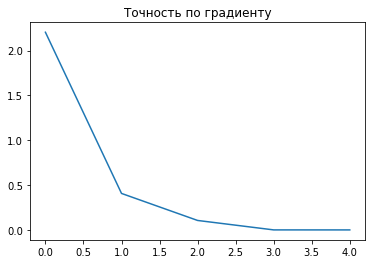

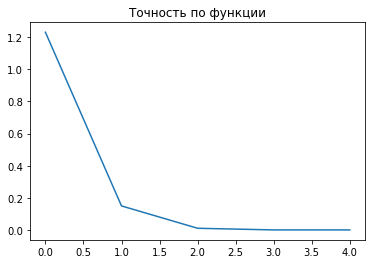

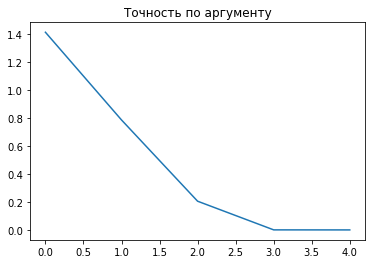

In [72]:
x_0 = np.array([1.0, 1.0])
x_real = np.array([0.0, 0.0])

Newton(f1, grad(f1), hessian(f1), x_0, 1e-5, x_real, num_iter = 500)

### Первая функция, сопряженные градиенты, хороший старт, $\epsilon = 0.01, 0.001$

Current x = [0.06815694 0.70646157]
Current function val = 0.6166112031273874
Current gradient norm =  0.3193344330947799
Current x = [0.01786305 0.00264364]
Current function val = 0.5003888019943767
Current gradient norm =  0.04410890079054305


{'x': array([1.93325998e-05, 2.60310206e-04]),
 'num_iter': 2,
 'GradNorm': 0.0001264358420647553}

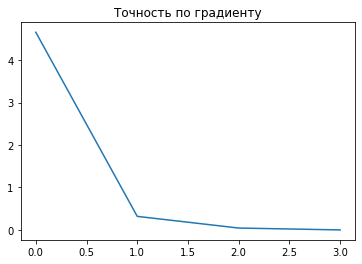

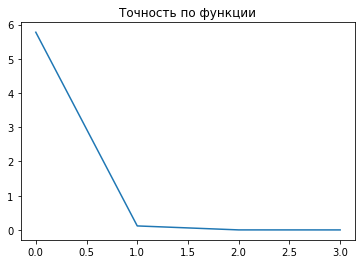

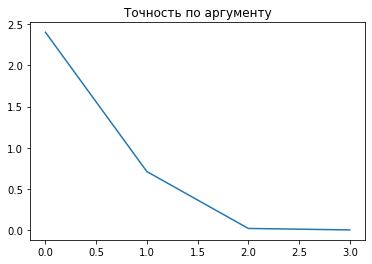

In [116]:
x_0 = np.array([2.3, .7])
x_real = np.array([.0, .0])
k = 100

NonQuadraticCG(f1, grad(f1), x_0, 1e-2, x_real, num_iter = 500)

### Первая функция, сопряженные градиенты, хороший старт, $\epsilon = 0.00001$

Current x = [0.06815694 0.70646157]
Current function val = 0.6166112031273874
Current gradient norm =  0.3193344330947799
Current x = [0.01786305 0.00264364]
Current function val = 0.5003888019943767
Current gradient norm =  0.04410890079054305
Current x = [1.93325998e-05 2.60310206e-04]
Current function val = 0.5000000161494192
Current gradient norm =  0.0001264358420647553


{'x': array([-2.05129618e-09,  1.17539598e-08]),
 'num_iter': 3,
 'GradNorm': 1.0290856789691083e-08}

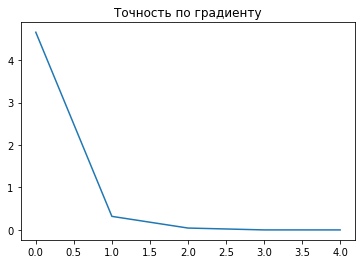

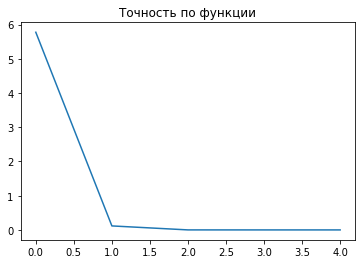

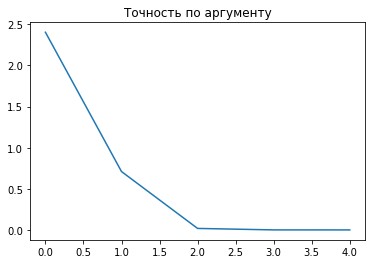

In [73]:
x_0 = np.array([2.3, .7])
x_real = np.array([.0, .0])
k = 100

NonQuadraticCG(f1, grad(f1), x_0, 1e-5, x_real, num_iter = 500)

### Первая функция, метод Ньютона, плохой старт

Current x = [ 0.         20.40816327]
Current function val = 1.0
Current gradient norm =  0.0


{'x': array([ 0.        , 20.40816327]), 'num_iter': 1, 'tol': 0.0}

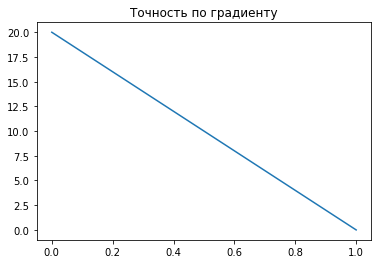

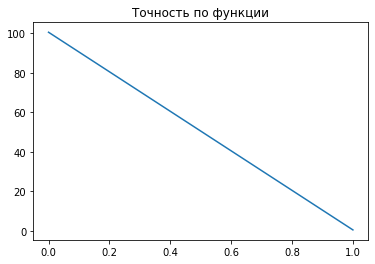

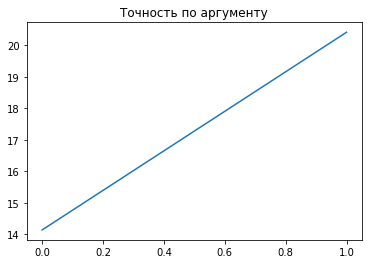

In [74]:
x_0 = np.array([10.0, 10.0])
x_real = np.array([0.0, 0.0])
k = 100

title = f'Первая функция, (0.5, 0), наискорейший спуск'
Newton(f1, grad(f1), hessian(f1), x_0, 1e-8, x_real, num_iter = 500)

## Задача 2
Данная функция является квадратичной, выпуклой, гессиан не вырожден, т.о. метод Ньютона должен сойтись за 1 шаг.

### Вторая функция, метод Ньютона, $\forall \epsilon$

Current x = [1.1 1.1 1.1 1.1]
Current function val = 3.2040999999999995
Current gradient norm =  9.237055564881302e-13


{'x': array([1.1, 1.1, 1.1, 1.1]), 'num_iter': 1, 'tol': 9.237055564881302e-13}

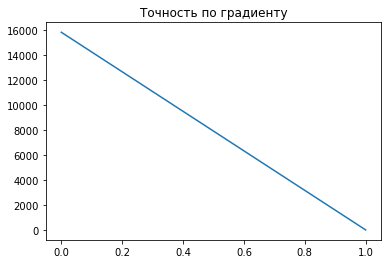

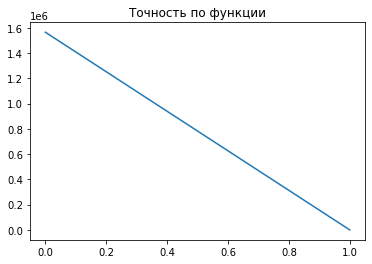

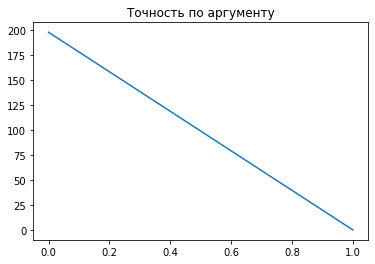

In [78]:
x_0 = np.array([100.0, 100.0, 100.0, 100.0])
x_real = np.array([xo, xo, xo, xo])

Newton(f2, grad(f2), hessian(f2), x_0, 1e-5, x_real, num_iter = 500)

## Задача 3
Поскольку данная задача является задачей условной (и выпуклой) оптимизации, попробуем применить метод проекции градиента. С шагом заморачиваться не будем, и возьмём постоянным, к примеру, $\alpha = 0.1$. Теперь для данного метода осталось только аналитически высчитать $$x_{k + 1} = \arg\min\limits_{y = x + 1, y + x \leq -1}(-\alpha\nabla f(x_k), x) + \frac{1}{2}\|x_k - x\|_2^2$$
Получаем, что необходимо найти минимум $-6\alpha x(x_k - 1) + (x - x_k)^2$, который, очевидно, достигается в точке $\min(x_k - 3\alpha(x_k - 1), -1).$

### Третья функция, метод проекции субградиента, $\forall \epsilon$, остановка по функции

Current x = [-35.4 -34.4]
Current function val = 3978.879999999999
Current gradient norm =  226.5412986631797
Current x = [-24.48 -23.48]
Current function val = 1951.6911999999993
Current gradient norm =  161.07878320871436
Current x = [-16.836 -15.836]
Current function val = 958.3686879999999
Current gradient norm =  115.29388646411395
Current x = [-11.4852 -10.4852]
Current function val = 471.64065711999996
Current gradient norm =  83.29626093312952
Current x = [-7.73964 -6.73964]
Current function val = 233.1439219887999
Current gradient norm =  60.96501048852201
Current x = [-5.117748 -4.117748]
Current function val = 116.28052177451197
Current gradient norm =  45.41662767416955
Current x = [-3.2824236 -2.2824236]
Current function val = 59.017455669510845
Current gradient norm =  34.63123061102695
Current x = [-1.99769652 -0.99769652]
Current function val = 30.958553278060315
Current gradient norm =  27.189731614282692
Current x = [-1.09838756 -0.09838756]
Current function val = 17.

{'x': array([-1,  0]), 'num_iter': 10, 'GradNorm': 21.540659228538015}

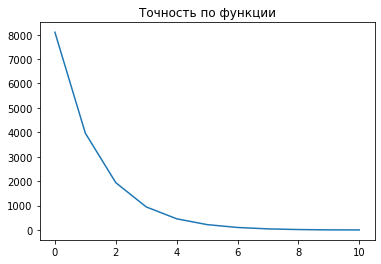

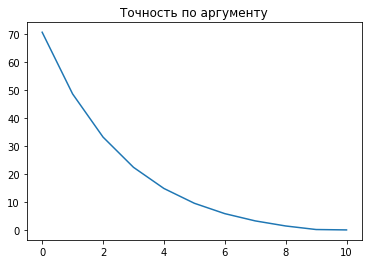

In [114]:
x_0 = np.array([-51.0, -50.0])
x_real = np.array([-1.0, 0.0])

Projected_descent(x_0, f3, gradf3, argminf3, x_real, eps = 1e-5, max_iter = 1000)

## Задачи 4-5 (см. .pdf-файл)
Задача 4 является задачей линейного программирования в чистом виде, надо лишь привести её к канонической форме и далее использовать симплекс метод. Задача 5 также может быть приведена к LP через несколько этапов.

## Задача 6
Заметим, что минимизируемая функция $g(x)$ не является дифференцируемой. Она является суммой гладкой функции $f(x)$ и недифференцируемой $h(x)$. Поэтому, принимая это во внимание, будем использовать композитную оптимизацию, то есть учитывать отстутвие градиента недифференцируемой функции: $$x_{k+1} = \arg\min\{f(x_k) + (\nabla f(x_k), x - x_k) + \frac{L_k}{2}\|x - x_k\|_2^2 + h(x)\}$$.
Для вычисления нового $x_{k+1}$, таким образом, надо лишь для каждого $\lambda > 0$ и $x \in \mathcal{R}^3$ вычислить функцию $$Prox_{0.9\lambda\|\cdot\|_1}(x) = \arg\min_y\{0.9\lambda\|y\|_1 + \frac{1}{2}\|y - x\|_2^2\}$$
Заметим, что отдельные компоненты $y_i$ не оказывают в функции друг на друга влияние, получаем $0.9\partial\|y_i\|_1 + y_i - x_i = 0$, откуда оптимальный $y_i = sign(x_i)\cdot\max(|x_i| - 0.9\lambda, 0)$. Таким образом $$x_{k+1} = Prox_{0.9\|\cdot\|_1/L_k}(x_k - \frac{1}{L_k}\nabla f(x_k))$$

### Шестая функция, метод композитной оптимизации, $\epsilon = 0.01$

Current x = [-24.1  28.1   1.6]
Current function val = 9057.33
Current x = [ 134.6  -154.6     1.15]
Current function val = 272292.48
Current x = [-301.375  347.375    0.925]
Current function val = 1376581.0781249993
Current x = [ 188.871875 -217.121875    0.8125  ]
Current function val = 537133.7282519527
Current x = [ 35.66972656 -40.71660156   0.75625   ]
Current function val = 18828.046498603813
Current x = [-21.5560791   25.21037598   0.64375   ]
Current function val = 7285.470191715352
Current x = [-3.67301483  4.6081955   0.5875    ]
Current function val = 249.69554356326552
Current x = [ 2.80813427 -2.89262218  0.475     ]
Current function val = 89.71043413974148
Current x = [ 0.78277518 -0.54861666  0.41875   ]
Current function val = 2.476669358225993
Current x = [0.02326552 0.10538541 0.30625   ]
Current function val = 1.0647657365244565
Current x = [ 0.26061228 -0.          0.25      ]
Current function val = 0.13841053653431654
Current x = [ 0.34961732 -0.0125      0.1375   

{'x': array([ 0.32807771, -0.00859375,  0.        ]),
 'num_iter': 17,
 'FuncNorm': 0.0010525274530305828}

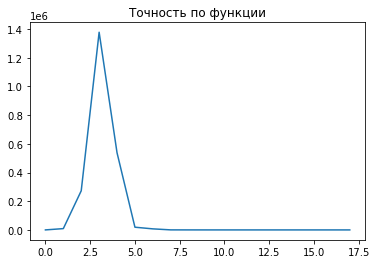

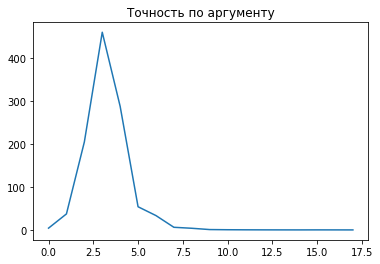

In [108]:
x_0 = np.array([2.5, -2.5, 2.5])
x_real = np.array([41.0/130, -1.0/130, 0.0])

CompositeDescent(f6_f, f6_h, grad(f6_f), proxyNorm_h, x_0, x_real, eps = 1e-2, num_iter = 1000)

### Шестая функция, метод композитной оптимизации, $\epsilon = 0.001$

Current x = [-24.1  28.1   1.6]
Current function val = 9057.33
Current x = [ 134.6  -154.6     1.15]
Current function val = 272292.48
Current x = [-301.375  347.375    0.925]
Current function val = 1376581.0781249993
Current x = [ 188.871875 -217.121875    0.8125  ]
Current function val = 537133.7282519527
Current x = [ 35.66972656 -40.71660156   0.75625   ]
Current function val = 18828.046498603813
Current x = [-21.5560791   25.21037598   0.64375   ]
Current function val = 7285.470191715352
Current x = [-3.67301483  4.6081955   0.5875    ]
Current function val = 249.69554356326552
Current x = [ 2.80813427 -2.89262218  0.475     ]
Current function val = 89.71043413974148
Current x = [ 0.78277518 -0.54861666  0.41875   ]
Current function val = 2.476669358225993
Current x = [0.02326552 0.10538541 0.30625   ]
Current function val = 1.0647657365244565
Current x = [ 0.26061228 -0.          0.25      ]
Current function val = 0.13841053653431654
Current x = [ 0.34961732 -0.0125      0.1375   

{'x': array([ 0.31389714, -0.00758667,  0.        ]),
 'num_iter': 19,
 'FuncNorm': 1.445426494955937e-05}

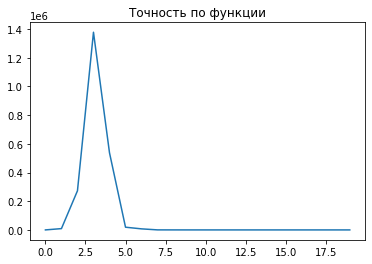

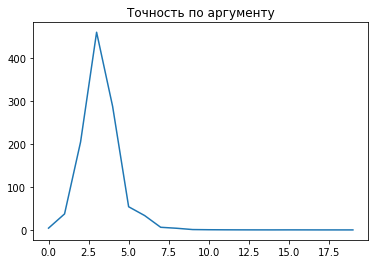

In [110]:
x_0 = np.array([2.5, -2.5, 2.5])
x_real = np.array([41.0/130, -1.0/130, 0.0])

CompositeDescent(f6_f, f6_h, grad(f6_f), proxyNorm_h, x_0, x_real, eps = 1e-3, num_iter = 1000)

### Шестая функция, метод композитной оптимизации, $\epsilon = 0.00001$

Current x = [-24.1  28.1   1.6]
Current function val = 9057.33
Current x = [ 134.6  -154.6     1.15]
Current function val = 272292.48
Current x = [-301.375  347.375    0.925]
Current function val = 1376581.0781249993
Current x = [ 188.871875 -217.121875    0.8125  ]
Current function val = 537133.7282519527
Current x = [ 35.66972656 -40.71660156   0.75625   ]
Current function val = 18828.046498603813
Current x = [-21.5560791   25.21037598   0.64375   ]
Current function val = 7285.470191715352
Current x = [-3.67301483  4.6081955   0.5875    ]
Current function val = 249.69554356326552
Current x = [ 2.80813427 -2.89262218  0.475     ]
Current function val = 89.71043413974148
Current x = [ 0.78277518 -0.54861666  0.41875   ]
Current function val = 2.476669358225993
Current x = [0.02326552 0.10538541 0.30625   ]
Current function val = 1.0647657365244565
Current x = [ 0.26061228 -0.          0.25      ]
Current function val = 0.13841053653431654
Current x = [ 0.34961732 -0.0125      0.1375   

{'x': array([ 0.31555893, -0.00770469,  0.        ]),
 'num_iter': 21,
 'FuncNorm': 1.98499122028295e-07}

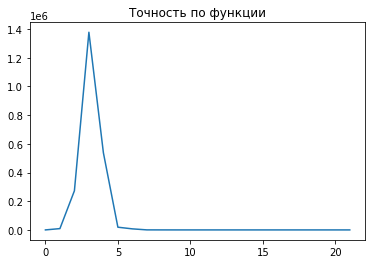

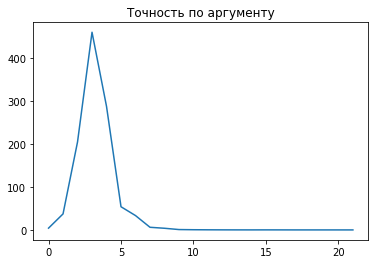

In [111]:
x_0 = np.array([2.5, -2.5, 2.5])
x_real = np.array([41.0/130, -1.0/130, 0.0])

CompositeDescent(f6_f, f6_h, grad(f6_f), proxyNorm_h, x_0, x_real, eps = 1e-5, num_iter = 1000)

## Задача 7
Рассмотрим допустимое множество. Из первого условия в векторном неравестве $Ax \leq b$ получаем, что $3x_1 + 2x_2 + x_3 \leq 1$. Подставляя в него $x_1 + x_2 + x_3 = 1$ получаем, что $2x_1 + x_2 \leq 0$, с другой стороны из $x_i > 0$: $2x_1 + x_2 > 0$, противоречие, то есть допустимое множество пусто.

## Выводы

|$f$|method|$\epsilon = 0.01$|$\epsilon = 0.001$|$\epsilon = 0.00001$|
|----------|----------------|-----------------|------|------|
|$f_1$|Conjugate GD                        |3 \ $\infty$|3 \ $\infty$|4 \ $\infty$|
|$f_2$|Newton                              |1|1|1|
|$f_3$|Projected GD                           |10|10|10|
|$f_4$|Simplex                              |2|2|2|
|$f_5$|Simplex                          |1|1|1|
|$f_6$|Composite                            |17 \ $\infty$|19 \ $\infty$|21 \ $\infty$|
|$f_7$|-                            |-|-|-|

Первая функция в области так называемой квадратичной сходимости ведёт себя хорошо, однако, если начальное приближение выбрать вне этой области, то она вскорести останавливается. Это обусловлено тем, что последовательность точек по первой координате быстро выходит на 0, и мы начинаем искать минимум почти линейной функции (см. самый первый график, что. кончено, приводит к останову далеко от точки минимума. О второй функции всё сказана в соответствующем обзаце - она квадратичная и выпуклая, поэтому по определению метод Ньютона будет сходится за 1 шаг. Для третьей функции пришлось аналитически высчитывать проекцию, при этом из-за условного характера задачи пришлось использовать в качестве критерия останова невязку по функции. По четвёртой и пятой задаче - это просто LP. В шестой аналитически высчитывался $\arg\min$, однако вдалеке от оптимальной точки такой метод расходится. Из-за недифференцируемости функции использовалась невязка по функции.